<a href="https://colab.research.google.com/github/JaperTai77/Colab-notebook/blob/main/ML_sklearn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Cross-validation

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data,columns = iris.feature_names)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## SVM/Logistic Cross-validation

In [ ]:
X = iris.data[:, :2]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train,
y_train, test_size=0.25)

In [ ]:
# Run Logistic and SVM
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
svc_clf = SVC(kernel = 'linear').fit(X_train_2, y_train_2)
lr_clf = LogisticRegression().fit(X_train_2,y_train_2)
svc_pred = svc_clf.predict(X_test_2)
lr_pred = lr_clf.predict(X_test_2)
print('svm',accuracy_score(y_test_2,svc_pred))
print('logistic',accuracy_score(y_test_2,lr_pred))

svm 0.8214285714285714
logistic 0.7857142857142857


In [ ]:
# Full test dataset
print(accuracy_score(y_test, svc_clf.predict(X_test)))

0.7631578947368421


In [ ]:
# Multiple cross-validation
from sklearn.model_selection import cross_val_score
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=5)
lr_scores = cross_val_score(lr_clf, X_train, y_train, cv=5)
print('logistic',lr_scores.mean(),lr_scores.std()) # mean and sd of the accuracy
print('svc',svc_scores.mean(),svc_scores.std()) # mean and sd of the accuracy

logistic 0.8221343873517787 0.061041285420871554
svc 0.8134387351778656 0.0617992753353185


## SVM for regression (SVR) and classificaiton (SVC)

There are three classes and there are no order, so regression might not be a good method to use.

In [ ]:
# SVC
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y)
svc_clf = SVC(kernel = 'linear').fit(X_train, y_train)
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=5)
print('svc',svc_scores.mean(),svc_scores.std())

svc 0.8126482213438735 0.052098999997569714


In [ ]:
# SVR
from sklearn.svm import SVR
svr_clf = SVR(kernel = 'linear').fit(X_train, y_train)

from sklearn.metrics import make_scorer
def for_scorer(y_test, orig_y_pred):
  y_pred = np.rint(orig_y_pred).astype(np.int)
  return accuracy_score(y_test, y_pred)
svr_to_class_scorer = make_scorer(for_scorer,greater_is_better=True)

svr_scores = cross_val_score(svr_clf, X_train, y_train, cv=5,scoring = svr_to_class_scorer)
print('svr',svr_scores.mean(),svr_scores.std())

svr 0.733201581027668 0.11337743313395914


## Linear and non-linear

In [ ]:
from sklearn.svm import SVC
svc_poly_clf = SVC(kernel = 'poly', degree= 3).fit(X_train, y_train)
svc_poly_scores = cross_val_score(svc_clf, X_train, y_train, cv=4)
svc_poly_scores.mean()

0.7857142857142858

# Pre-processing

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
X,y = boston.data, boston.target

In [ ]:
X[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

## Standard scaler

In [ ]:
from sklearn import preprocessing
my_scaler = preprocessing.StandardScaler()
Xs = my_scaler.fit_transform(X)

## MinMax scaler

In [ ]:
my_minmax_scaler = preprocessing.MinMaxScaler()
# preprocessing.MinMaxScaler(feature_range=(-3.14, 3.14))
Xs = my_minmax_scaler.fit_transform(X)

## Normalize

In [ ]:
Xs = preprocessing.normalize(X)

# Dimension Reduction

## PCA

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
y = iris.target

In [23]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
iris_X_prime = pca.fit_transform(iris_X)
iris_X_prime.shape

(150, 2)

In [4]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

Text(0.5, 1.0, 'After PCA')

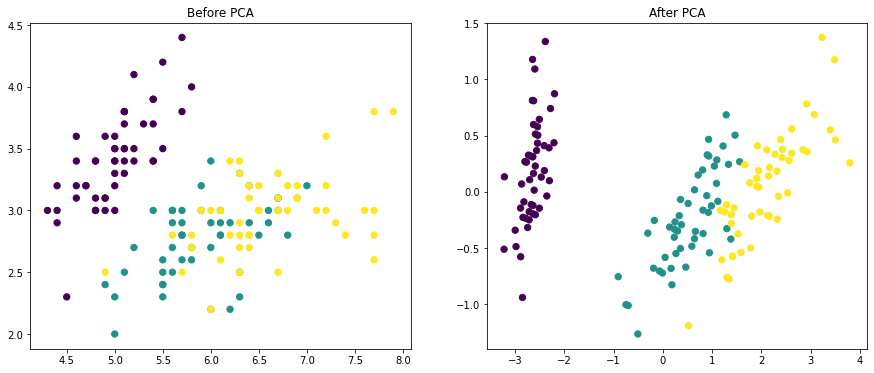

In [6]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121)
ax.scatter(iris_X[:,0],iris_X[:,1],c=y,s=40)
ax.set_title('Before PCA')
ax2 = fig.add_subplot(122)
ax2.scatter(iris_X_prime[:,0],iris_X_prime[:,1],c=y,s=40)
ax2.set_title('After PCA')

### Specify explained variance

In [11]:
pca = decomposition.PCA(n_components=.98) #0.98 explained variance
iris_X_prime = pca.fit_transform(iris_X)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

### Scaled data PCA

In [12]:
from sklearn import preprocessing
iris_X_scaled = preprocessing.scale(iris_X)
iris_X_scaled = pca.fit_transform(iris_X_scaled)

Text(0.5, 1.0, 'Scaling followed by PCA')

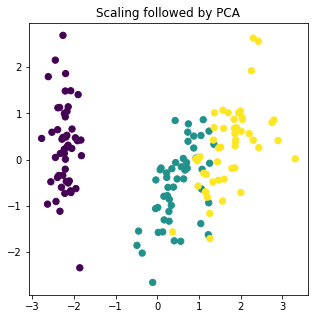

In [15]:
fig = plt.figure(figsize=(5,5))
ax2 = fig.add_subplot()
ax2.scatter(iris_X_scaled[:,0],iris_X_scaled[:,1],c=y,s=40)
ax2.set_title('Scaling followed by PCA')

## Factor Analysis

In [18]:
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=2)
iris_two_dim = fa.fit_transform(iris.data)

In [21]:
iris_two_dim[:5]

array([[-1.32761727, -0.56131076],
       [-1.33763854, -0.00279765],
       [-1.40281483,  0.30634949],
       [-1.30104274,  0.71882683],
       [-1.33342439, -0.36458899]])

## Kernal PCA

Deal with non-linear data

In [24]:
kpca = decomposition.KernelPCA(kernel='cosine', n_components=2)
iris_X_prime_kernal = kpca.fit_transform(iris_X)

Kenal option:\
-Poly (polynomial)\
-RBF (radial basis function)\
-Sigmoid\
-Cosine\
-Pre-computed

Text(0.5, 1.0, 'kernal PCA')

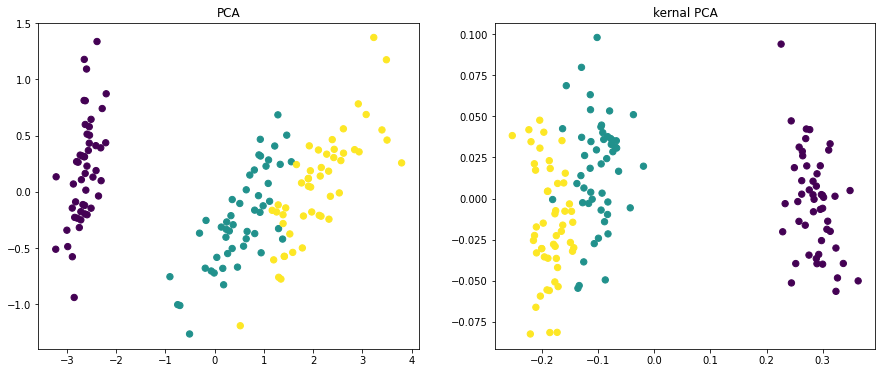

In [26]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121)
ax.scatter(iris_X_prime[:,0],iris_X_prime[:,1],c=y,s=40)
ax.set_title('PCA')
ax2 = fig.add_subplot(122)
ax2.scatter(iris_X_prime_kernal[:,0],iris_X_prime_kernal[:,1],c=y,s=40)
ax2.set_title('kernal PCA')

## Truncated SVD

Matrix factorization 

In [28]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(2)
iris_transformed = svd.fit_transform(iris_X)
svd.explained_variance_ratio_

array([0.52875361, 0.44845576])

Text(0.5, 1.0, 'Trun. SVD')

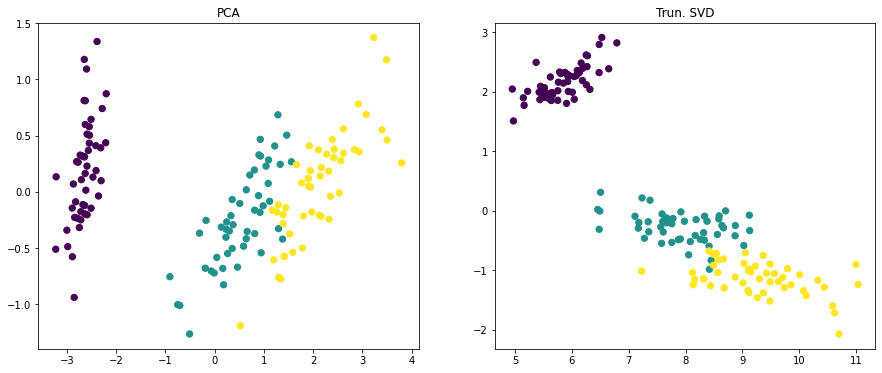

In [29]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121)
ax.scatter(iris_X_prime[:,0],iris_X_prime[:,1],c=y,s=40)
ax.set_title('PCA')
ax2 = fig.add_subplot(122)
ax2.scatter(iris_transformed[:,0],iris_transformed[:,1],c=y,s=40)
ax2.set_title('Trun. SVD')

## Dictionary Learning

Dictionary Learning transform dataset into a sparse representation

In [31]:
X_train = iris_X[::2]
X_test = iris_X[1::2]
y_train = y[::2]
y_test = y[1::2]
from sklearn.decomposition import DictionaryLearning
dl = DictionaryLearning(3)
transformed = dl.fit_transform(X_train)
test_transform = dl.transform(X_test)

Text(0.5, 0.92, 'Testing Set')

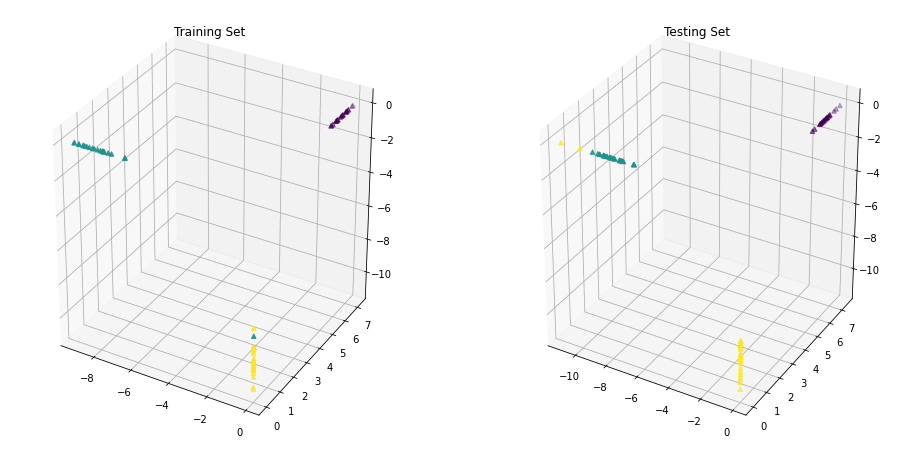

In [34]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(transformed[:,0],transformed[:,1],transformed[:,2],c=y_train,marker = '^')
ax.set_title("Training Set")
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(test_transform[:,0],test_transform[:,1],test_transform[:,2],c=y_test,marker = '^')
ax2.set_title("Testing Set")

## Manifolds

In [38]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS, Isomap
iris_pca = PCA(n_components = 2).fit_transform(iris_X)
iris_tsne = TSNE(learning_rate=200).fit_transform(iris_X)
iris_MDS = MDS(n_components = 2).fit_transform(iris_X)
iris_ISO = Isomap(n_components = 2).fit_transform(iris_X)

Text(0.5, 1.0, 'ISO')

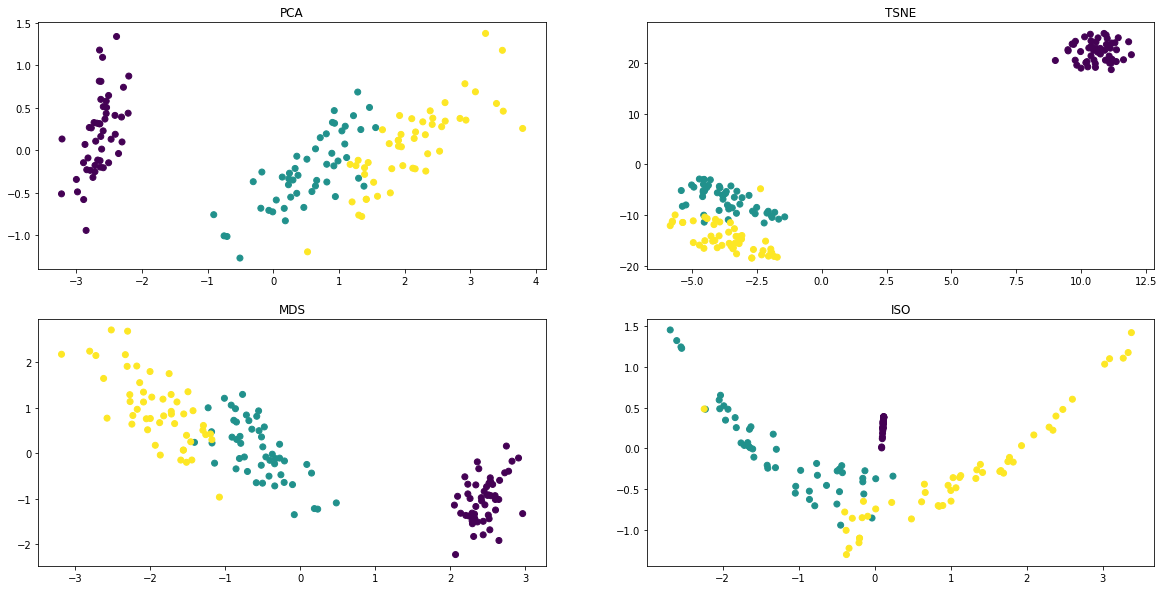

In [39]:
plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.title('PCA')
plt.scatter(iris_pca [:, 0], iris_pca [:, 1], c=y)
plt.subplot(222)
plt.scatter(iris_tsne[:, 0], iris_tsne[:, 1], c=y)
plt.title('TSNE')
plt.subplot(223)
plt.scatter(iris_MDS[:, 0], iris_MDS[:, 1], c=y)
plt.title('MDS')
plt.subplot(224)
plt.scatter(iris_ISO[:, 0], iris_ISO[:, 1], c=y)
plt.title('ISO')

More than 50 col: PCA, truncated SVD before t-SNE


Text(0.5, 1.0, 'PCA followed by TSNE')

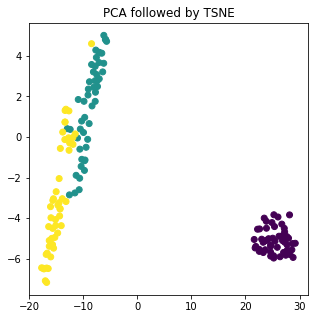

In [41]:
iris_pca_then_tsne = TSNE(learning_rate=200).fit_transform(iris_pca)
plt.figure(figsize=(5, 5))
plt.scatter(iris_pca_then_tsne[:, 0], iris_pca_then_tsne[:, 1], c=y)
plt.title("PCA followed by TSNE")

# Linear Regression 

## OLS

In [47]:
from sklearn import datasets
boston = datasets.load_boston()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(boston.data, boston.target)
from sklearn.model_selection import cross_val_predict
predictions_cv = cross_val_predict(lr, boston.data, boston.target,cv=10)

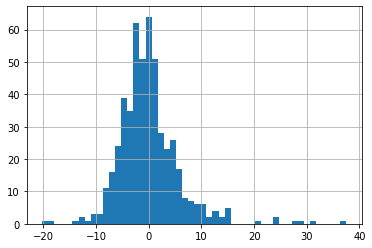

In [44]:
pd.Series(boston.target - predictions_cv).hist(bins=50)

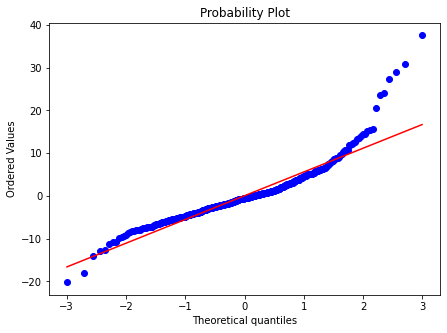

In [48]:
from scipy.stats import probplot
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
tuple_out = probplot(boston.target - predictions_cv, plot=ax)

In [52]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(boston.target,predictions_cv))

34.53965953999324


## Ridge Regression

In [53]:
# generate data
from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=100, n_features=2,effective_rank=1, noise=10)

In [56]:
from sklearn.linear_model import RidgeCV
rcv = RidgeCV(alphas=np.array([.1, .2, .3, .4]))
rcv.fit(reg_data, reg_target)
rcv.alpha_ # best alpha choice

0.1

Get a more accurate alpha

In [57]:
rcv2 = RidgeCV(alphas=np.array([.08, .09, .1, .11, .12]))
rcv2.fit(reg_data, reg_target)
rcv2.alpha_ # best alpha choice

0.08

In [72]:
alphas_to_test = np.linspace(0.0001, 0.1)
rcv3 = RidgeCV(alphas=alphas_to_test, store_cv_values=True)
rcv3.fit(reg_data, reg_target)
rcv3.alpha_ # best alpha choice

0.014371428571428571

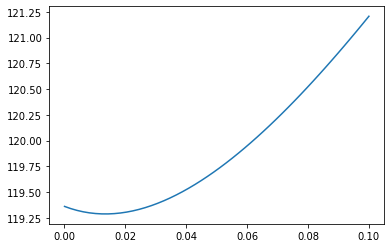

In [73]:
plt.plot(alphas_to_test, rcv3.cv_values_.mean(axis=0))

In [74]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
MAD_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
rcv4 = RidgeCV(alphas=alphas_to_test, store_cv_values=True,scoring=MAD_scorer)
rcv4.fit(reg_data, reg_target)
smallest_idx = rcv4.cv_values_.mean(axis=0).argmin()

In [75]:
print(rcv4.cv_values_.mean(axis=0)[smallest_idx]) # score
print(alphas_to_test[smallest_idx]) # best alpha

-0.007063315364046554
0.0001


In [84]:
from sklearn.linear_model import Ridge
r = Ridge(alpha = 0.0001) # linear regression
r.fit(reg_data, reg_target)

## Bayesian ridge regression

Easier to estimate the confidence interval

In [81]:
# generate data
X = np.linspace(0, 5)
y_truth = 3 * X
y_noise = np.random.normal(0, 0.5, len(y_truth))
y_noisy = (y_truth + y_noise)
print(X[0:5])
X = X.reshape(-1, 1)
X[0:5]

[0.         0.10204082 0.20408163 0.30612245 0.40816327]


array([[0.        ],
       [0.10204082],
       [0.20408163],
       [0.30612245],
       [0.40816327]])

<ErrorbarContainer object of 3 artists>

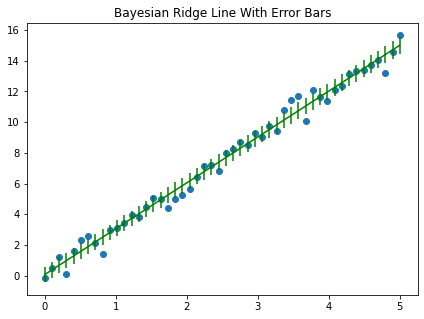

In [82]:
from sklearn.linear_model import BayesianRidge
br_inst = BayesianRidge().fit(X, y_noisy)
y_pred, y_err = br_inst.predict(X.reshape(-1, 1), return_std=True)
plt.figure(figsize=(7, 5))
plt.scatter(X, y_noisy)
plt.title("Bayesian Ridge Line With Error Bars")
plt.errorbar(X, y_pred, y_err, color='green')

BayesianRidge(alpha_1, alpha_2, lambda_1, and lambda_2)\
Optimize hyperparameter using cross-validated

## Lasso

In [7]:
# generate data
import numpy as np
from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=200,
n_features=500, n_informative=5, noise=5)
reg_data.shape

(200, 500)

In [4]:
# Optimize hyperparameter using cross-validated
from sklearn.linear_model import LassoCV
lassocv = LassoCV(alphas = np.linspace(0.1, 0.5))
lassocv.fit(reg_data, reg_target)
lassocv.alpha_

0.3938775510204082

In [8]:
# reduce predictors
mask = lassocv.coef_ != 0
new_reg_data = reg_data[:, mask]
new_reg_data.shape

(200, 58)

In [9]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.3938775510204082)
lasso.fit(new_reg_data,reg_target)

Lasso(alpha=0.3938775510204082, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

## LARS

When predictors > observations

In [10]:
# generate dataset
from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=200,n_features=500, n_informative=10, noise=2)

In [11]:
from sklearn.linear_model import LarsCV
lcv = LarsCV()
lcv.fit(reg_data, reg_target)
np.sum(lcv.coef_ != 0)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 195 iterations, i.e. alpha=6.838e-02, with an active set of 160 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 195 iterations, i.e. alpha=6.207e-02, with an active set of 160 regressors, and the smallest cholesky pivot element being 6.495e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 195 iterations, i.e. alpha=6.077e-02, with an active set of 160 regressors, and the smallest cholesky pi

11

11 nonzero coefficents is a good choice.\
We specify 10 informative features in the dataset, so 11 is a good choice (10 is what we really want).

In [12]:
from sklearn.linear_model import Lars
lars = Lars(n_nonzero_coefs=11) # 11 nonzero coefficients in LARS
lars.fit(reg_data, reg_target)
train_n = 100
np.mean(np.power(reg_target[train_n:] - lars.predict(reg_data[train_n:]), 2))

7.566951716989592